# CS375 Assignment 2 Lab Report
#### Group 6 

## Part 1: Task Generalization

In [107]:
%matplotlib inline 
import os
import numpy as np
import tensorflow as tf
import pymongo as pm
import gridfs
import cPickle
import scipy.signal as signal
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, trange
from assignment_utils import *

### Getting data from the database

In [108]:
from model_switcher import *

In [121]:
my_model_shallow = model_switcher(model_name = 'shallow_bottle',
                          data_name = 'imagenet',
                          loss_name = 'default',
                          exp_id  = 'stride2')

In [122]:
vars(my_model_shallow)

{'collname': 'shallow_bottle_default',
 'data_name': 'imagenet',
 'dbname': 'imagenet',
 'exp_fn': <class experiments.imagenet at 0x7f17fb481a10>,
 'exp_id': 'stride2',
 'layers': ['conv1', 'deconv1'],
 'loss_fn': <function losses.autoencoder_loss>,
 'loss_name': 'default',
 'model_fn': <function models.shallow_bottle>,
 'model_name': 'shallow_bottle'}

In [123]:
#v_list = ['V0V3V6', 'V6']
#target_layers = ['pool1', 'conv2', 'conv3', 'conv4', 'conv5', 'pool5', 'fc6', 'fc7']
#step_list = [90000, 150000, 240000]

In [124]:
coll = p_get_coll(vars(my_model_shallow)['collname'], vars(my_model_shallow)['dbname'])
print(coll)

coll.distinct('exp_id')

Collection(Database(MongoClient(host=['localhost:24444'], document_class=dict, tz_aware=False, connect=True), u'imagenet'), u'shallow_bottle_default.files')


[u'stridebig', u'omgitworks2']

### Plotting the training curve
To see the training curve for the experiment, we pull the training loss and plot it, along with a smoothed version of the training loss obtained by convolving the loss with a boxcar.

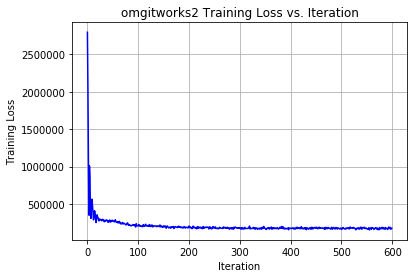

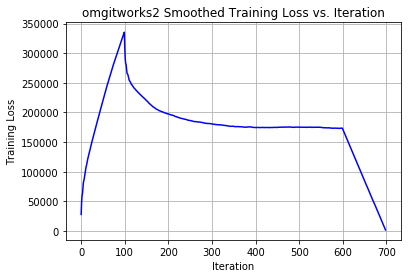

In [125]:
# TODO Double check this. Bit hacky
texp_id = coll.distinct('exp_id')[-1]
p22_training(texp_id,coll)

### Plotting the validation results

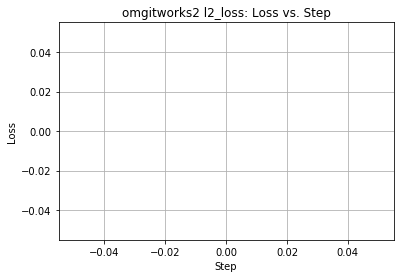

In [126]:
l2_loss, img_inputs, img_prediction = get_validation_data(texp_id, coll)
plot_l2_loss(l2_loss, texp_id)

In [127]:
exp_id = texp_id
q_val = {'exp_id' : exp_id, 'validation_results' : {'$exists' : True}, 'validates' : {'$exists' : False}}

In [128]:
val_steps = coll.find(q_val, projection = ['validation_results'])

In [129]:
val_steps[0]['validation_results']['valid0'].keys()

IndexError: no such item for Cursor instance

In [65]:
np_inputs = np.array(img_inputs).transpose((0,2,3,4,1))
np_prediction = np.array(img_prediction).transpose((0,2,3,4,1))
my_shape = np_inputs.shape
row_len = 2

plot_images(np_inputs[-1, :].squeeze(), 1, 2, row_len)
plot_images(np_prediction[-1, :].squeeze(), 1, 2, row_len)
for i in range(0,1):
    plot_images(np_prediction[-1, :].squeeze(), i, 2, row_len)

ValueError: axes don't match array

## Part 2: Representational Similararity Analysis (RSA)


In [ ]:
data = {}
for iv in v_list:
    for istep in step_list:
        data[(iv, istep)] = p_get_data_list(coll, collname, istep, iv)

### Analyzing the RDM results

We will start with visualizing the RDMs we computed for each layer and the IT neurons. 

In [ ]:
for istep in step_list:
    plot_rdms(data[('V6',istep)], target_layers, istep)

In [ ]:
for istep in step_list:
    plot_rdms(data[('V0V3V6',istep)], target_layers, istep)

### Analyzing the categorization results

Now let's visualize the results of the categorization and within categorization test we performed for each layer. Describe what you see.    

In [ ]:
for istep in step_list:
    plot_categorization_results(data[('V6',istep)], target_layers, istep)

In [ ]:
for istep in step_list:
    plot_categorization_results(data[('V0V3V6',istep)], target_layers, istep)

In [ ]:
categories = ['Animals', 'Boats', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes', 'Tables']
for category in categories:
    for istep in step_list:
        plot_categorization_results(data[('V6',istep)], target_layers, istep, category=category)

In [ ]:
categories = ['Animals', 'Boats', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes', 'Tables']
for category in categories:
    for istep in step_list:
        plot_categorization_results(data[('V0V3V6',istep)], target_layers, istep, category=category)

### Continuous estimation results
We regress our activations against the 'ty' continuous variable. 

In [ ]:
print("Continuous Estimation Task for ty \n")
for istep in step_list:
    for layer in target_layers:
        print('step: '+str(istep) + ', ' + layer + ":")
        print(data[('V6',istep)]['continuous_' + layer])
        print("")

In [ ]:
print("Continuous Estimation Task for ty \n")
for istep in step_list:
    for layer in target_layers:
        print('step: '+str(istep) + ', ' + layer + ":")
        print(data[('V0V3V6',istep)]['continuous_' + layer])
        print("")

## Part 3: Neural Response Regression

We will now display the results of the regression test. 

Please print (1 - data['it\_regression_"insert_target_layer_here"']['noise_corrected_multi_rsquared_loss']) for each layer and step and label the print out with the layer name and step. Describe what you observe.    


In [ ]:
for istep in step_list:
    plot_regression_results(data[('V6',istep)], target_layers, istep)

In [ ]:
for istep in step_list:
    plot_regression_results(data[('V0V3V6',istep)], target_layers, istep)

## Part 4: Filter Visualization Evaluations

Lastly, we will plot the conv1 filter kernels. 

###TODO THIS SHOULD BE FOR EACH TRAINING TIMEPOINT

In [ ]:
for istep in step_list:
    plot_conv1_kernels(data[('V0V3V6',istep)], istep)

## Part 5: Evaluation of the unsupervised models on ImageNet